# Word frequencies

In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 
#sklearn is a package for machine learning
#CountVectorizer is a great tool for word frequencies

In [2]:
filenames = ['/Users/vojtech/Disk Google/python/word-frequency/data/austen-brontë/Austen_Emma.txt',
             '/Users/vojtech/Disk Google/python/word-frequency/data/austen-brontë/Austen_Pride.txt',
             '/Users/vojtech/Disk Google/python/word-frequency/data/austen-brontë/Austen_Sense.txt',
             '/Users/vojtech/Disk Google/python/word-frequency/data/austen-brontë/CBronte_Jane.txt',
             '/Users/vojtech/Disk Google/python/word-frequency/data/austen-brontë/CBronte_Professor.txt',
             '/Users/vojtech/Disk Google/python/word-frequency/data/austen-brontë/CBronte_Villette.txt']

In [3]:
#this comment line only

In [4]:
vectorizer = CountVectorizer(input='filename')
dtm = vectorizer.fit_transform(filenames)
vocab = vectorizer.get_feature_names()

In [5]:
dtm = dtm.toarray()
vocab = np.array(vocab)

In [6]:
dtm[0:5, vocab =='house']

array([[ 95],
       [107],
       [161],
       [182],
       [ 93]], dtype=int64)

In [7]:
n, _ = dtm.shape

In [8]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(dtm)
np.round(dist, 1) # to round the values to 1 decimal 

array([[    0. ,  3856.3,  4182.8,  5119.7,  7113.3,  5280.2],
       [ 3856.3,     0. ,  1922.6,  6313.1,  4126.2,  6381.2],
       [ 4182.8,  1922.6,     0. ,  6657.4,  4045.3,  6650.3],
       [ 5119.7,  6313.1,  6657.4,     0. ,  8363.8,  2591.5],
       [ 7113.3,  4126.2,  4045.3,  8363.8,     0. ,  8484.1],
       [ 5280.2,  6381.2,  6650.3,  2591.5,  8484.1,     0. ]])

In [9]:
dist[1,3]

6313.0833987838305

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(dtm)
np.round(dist, 2)

array([[-0.  ,  0.02,  0.03,  0.05,  0.06,  0.05],
       [ 0.02, -0.  ,  0.02,  0.05,  0.04,  0.04],
       [ 0.03,  0.02, -0.  ,  0.06,  0.05,  0.05],
       [ 0.05,  0.05,  0.06,  0.  ,  0.02,  0.01],
       [ 0.06,  0.04,  0.05,  0.02, -0.  ,  0.01],
       [ 0.05,  0.04,  0.05,  0.01,  0.01,  0.  ]])

In [11]:
dist[1,3] > dist[3,5]

True

In [12]:
import os 
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

In [13]:
dist

array([[ -2.22044605e-16,   1.97991646e-02,   2.54477700e-02,
          5.33033683e-02,   5.85056420e-02,   5.47577694e-02],
       [  1.97991646e-02,  -4.44089210e-16,   1.65970214e-02,
          4.70262343e-02,   4.31295508e-02,   4.32719403e-02],
       [  2.54477700e-02,   1.65970214e-02,  -4.44089210e-16,
          5.60580626e-02,   4.68418996e-02,   4.90020814e-02],
       [  5.33033683e-02,   4.70262343e-02,   5.60580626e-02,
          0.00000000e+00,   1.59794084e-02,   1.36726702e-02],
       [  5.85056420e-02,   4.31295508e-02,   4.68418996e-02,
          1.59794084e-02,  -6.66133815e-16,   1.09404259e-02],
       [  5.47577694e-02,   4.32719403e-02,   4.90020814e-02,
          1.36726702e-02,   1.09404259e-02,   4.44089210e-16]])

In [14]:
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]

In [15]:
for x, y, name in zip(xs, ys, names):
    color = 'orange' if "Austen" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

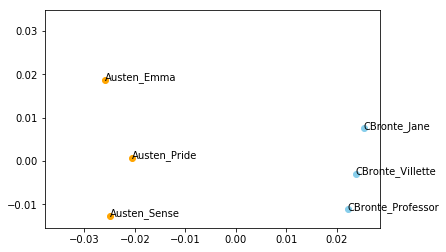

In [16]:
plt.show()